In [1]:
import numpy as np
import matplotlib.pylab as plt
import glob
from scipy import signal
import scipy
import os
from scipy.optimize import curve_fit

import matplotlib.ticker as mtick


In [2]:
files = sorted(glob.glob('spitfire_osc_wide_window/[0-9]*.csv'))

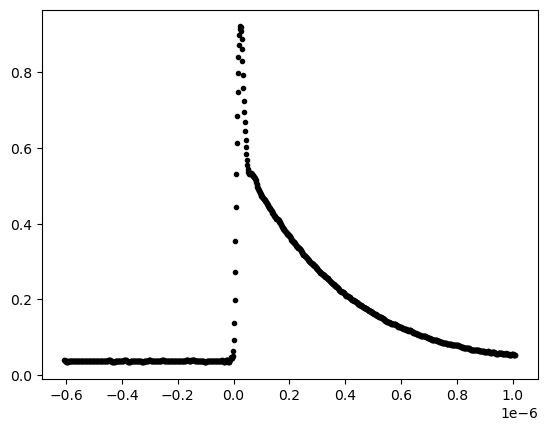

In [12]:
calibration =  np.loadtxt('spitfire_osc_wide_window/calibration.csv', delimiter = ',').T
plt.plot(*calibration, 'k.', ls = 'None' )

In [13]:
pos_mm = np.array([float(os.path.basename(f).replace('.csv','').replace('_','.')) for f in files])
sig = []

In [14]:
for f in files:
    t, v = np.loadtxt(f,delimiter = ',').T
    sig.append(np.sum(v)/len(v))
sig = np.array(sig)

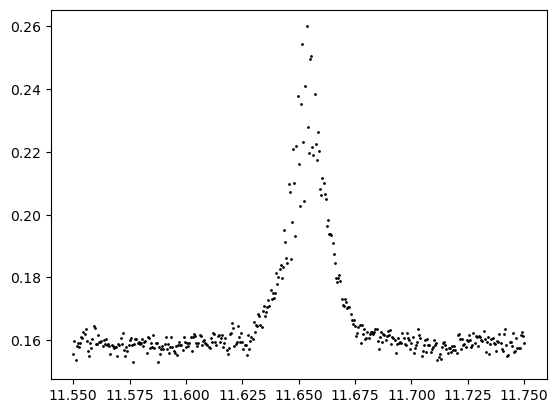

In [15]:
fig = plt.figure()
ax = plt.gca()
ax.plot(pos_mm, sig,'k.', label = 'Data', ms = 2)

In [16]:
def lor(x, x0 ,g):
    return 1/np.pi/g/(1+((x-x0)/g)**2) 

def gau(x, x0, s):
    return 1/np.sqrt(2/np.pi)/s*np.exp(-1/2*(x-x0)**2/s**2) 

def model(x,aL,aG, x0, g,s,C):
    return aG/1000 * gau(x,x0,s)+ C + aL/1000 * lor(x,x0,g)

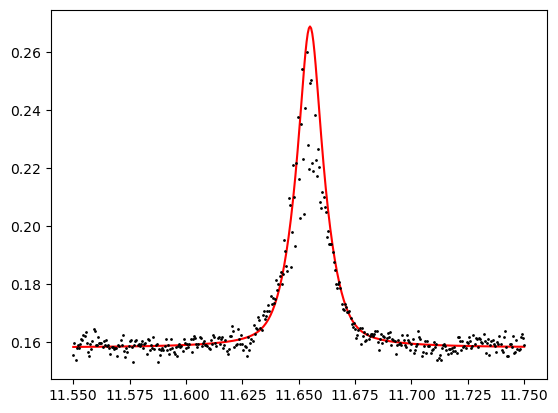

In [17]:

p0 = [1.5,.2, 11.655, .006,.008,.158]
plt.plot(pos_mm, model(pos_mm,*p0),'r-')
plt.plot(pos_mm, sig,'k.', ls = 'None', ms = 2)

In [18]:
fit, err = curve_fit(model, pos_mm, sig, p0=p0, 
                     bounds = ([.2,0.2,11.650, .002,.003,.150],
                    [3,1,11.665, .01,.05,.170]))

aL,aG,x0,g,s,C = fit
fit

array([8.77421929e-01, 2.68149842e-01, 1.16542029e+01, 6.47614079e-03,
       9.56147524e-03, 1.58482499e-01])

In [19]:
t_fs = (pos_mm - fit[2])/1e3/2.998e8/1e-15*2

In [20]:
fwhm_factor = 2.355
width = fit[-2]/1e3/3e8 /1e-15 * 2 
e_width = np.sqrt(np.diag(err))[-2]/1e3/3e8 /1e-15 
print(f'{width:.0f} +/- {e_width:.0f}')

64 +/- 2


In [23]:

width_gamma = fit[3]/1e3/3e8 / 1e-15 * 2
e_width_gamma = np.sqrt(np.diag(err))[3]/1e3/3e8 / 1e-15

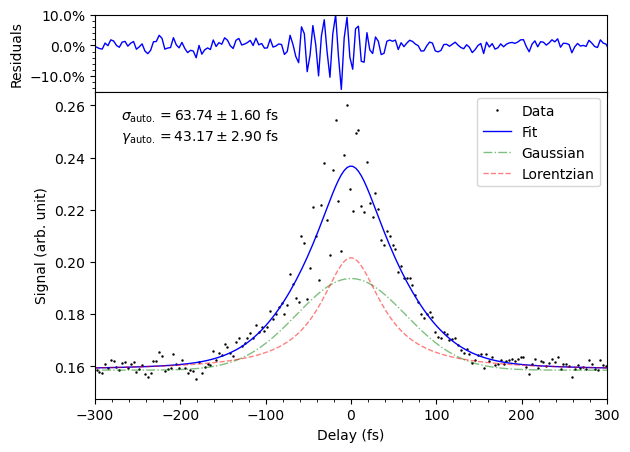

In [31]:
fig = plt.figure()
gs = fig.add_gridspec(2, 1,  height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.)


res_ax = fig.add_subplot(gs[0, 0])
ax = fig.add_subplot(gs[1, 0], sharex = res_ax)

ax.plot(t_fs, sig, 'k.', ms = 1.5, markevery=1, label = 'Data')
ax.plot(t_fs, model(pos_mm, *fit), c='b', lw = 1,  label ='Fit')
ax.plot(t_fs, gau(pos_mm, x0, s)*aG/1000+ C, '-.', c = 'green', lw =1, alpha = .5,  label ='Gaussian')
ax.plot(t_fs, lor(pos_mm, x0, g)*aL/1000+ C, '--', c ='r', lw =1, alpha = .5,   label = 'Lorentzian')
ax.set_xlabel('Delay (fs)')
ax.set_ylabel('Signal (arb. unit)')
ax.legend(loc = 0)

res_ax.plot(t_fs, (sig - model(pos_mm, *fit))/sig *100, 'b-', lw = 1)
res_ax.yaxis.set_major_formatter(mtick.PercentFormatter())
res_ax.minorticks_on()
res_ax.set_ylim(-15,10)
res_ax.set_ylabel('Residuals')

res_ax.set_xlim(-300,300)

text_out = "$\sigma_{\mathrm{auto.}}=$" + f"${width:.2f}\pm{e_width:.2f}$ fs\n" +\
        "$\gamma_{\mathrm{auto.}}=$" + \
        f"${width_gamma:.2f}\pm{e_width_gamma:.2f}$ fs\n"
ax.text(.05,.95, s = text_out, transform = ax.transAxes, va = 'top')
plt.setp(res_ax.get_xticklabels(),visible = False)


fig.savefig('../figures/spitfire.pdf', format= 'pdf', bbox_inches= 'tight')

In [13]:
Lc = fit[-3]/1e3/3e8 /1e-15 * 2
e_Lc = np.sqrt(np.diag(err))[-3]/1e3/3e8 /1e-15
print(f'{Lc:.3f} +/- {e_Lc:.3f}')

43.174 +/- 2.902


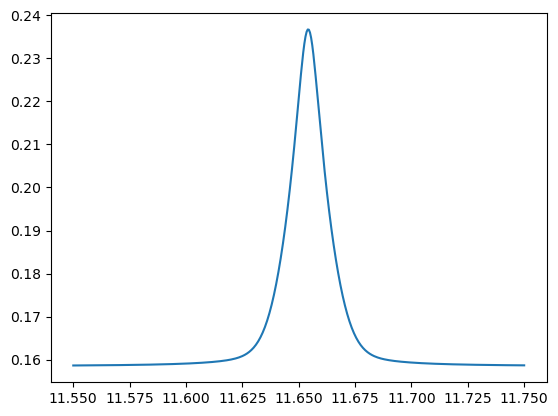

In [14]:
yy = model(pos_mm, *fit)
plt.plot(pos_mm, yy)